In [1]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

/home/apandy/environemnts/tabular/lib/python3.8/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [2]:
devdf = pd.read_json('dataset_raw/tatqa_dataset_dev.json')
questions=[]
for i, item in devdf.iterrows():
  for q in item['questions']:        
    if q['answer_type'] == 'arithmetic' and 'table' == q['answer_from']:   
        questions.append(q['question'])        


/home/apandy/environemnts/tabular/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/apandy/environemnts/tabular/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/apandy/environemnts/tabular/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/apandy/environemnts/tabular/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The defa

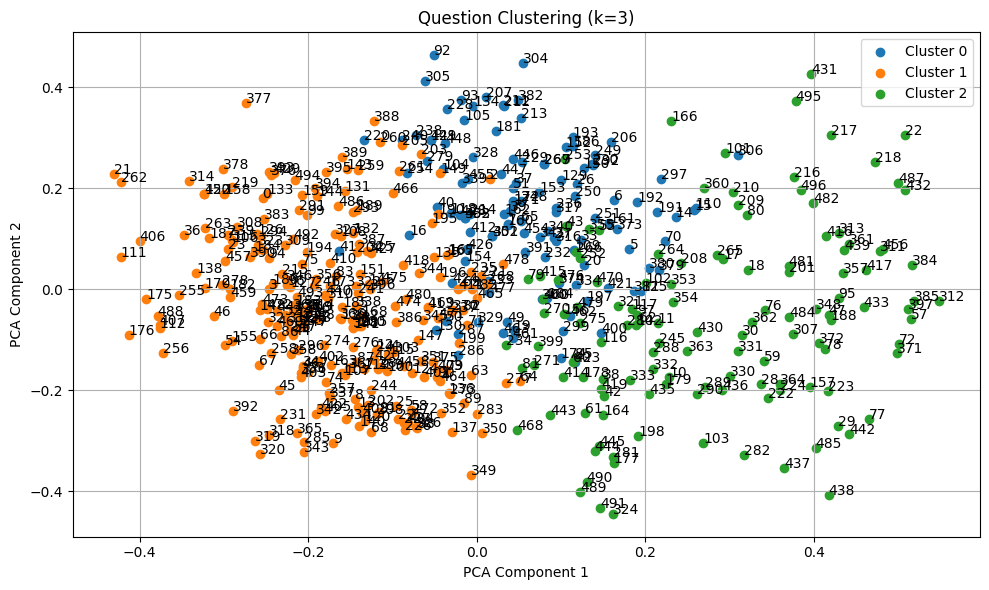

ModuleNotFoundError: No module named 'ace_tools'

In [4]:
# 2. Modell betöltése
model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

# 3. Embeddingek generálása
embeddings = model.encode(questions)

# 4. Optimális klaszterszám keresése (Silhouette score alapján)
silhouette_scores = []
range_n_clusters = range(3, 10)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(embeddings)
    score = silhouette_score(embeddings, labels)
    silhouette_scores.append(score)

# Legjobb klaszterszám kiválasztása
optimal_clusters = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]

# 5. KMeans újrafuttatása optimális klaszterszámmal
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
labels = kmeans.fit_predict(embeddings)

# 6. Adatok DataFrame-be
df = pd.DataFrame({
    'question': questions,
    'cluster': labels
})

# 7. Embeddingek 2D-re csökkentése PCA-val vizualizációhoz
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# 8. Vizualizáció
plt.figure(figsize=(10, 6))
for cluster_id in range(optimal_clusters):
    cluster_points = reduced_embeddings[labels == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster_id}")
for i, question in enumerate(questions):
    plt.annotate(f"{i}", (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))
plt.title(f"Question Clustering (k={optimal_clusters})")
plt.legend()
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

import ace_tools as tools; tools.display_dataframe_to_user(name="Clustered Questions", dataframe=df)